In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
np.random.seed(42) # Set a random seed for reproducibility
iris = load_iris(as_frame = True)
# all columns are measured in cm

In [3]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [4]:
X,y = iris.data,iris.target

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
y.value_counts()

,count
target,
0,50
1,50
2,50


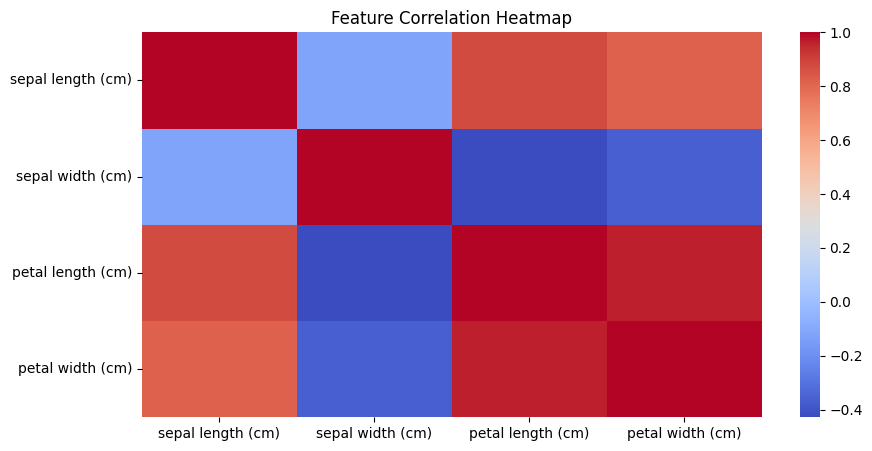

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

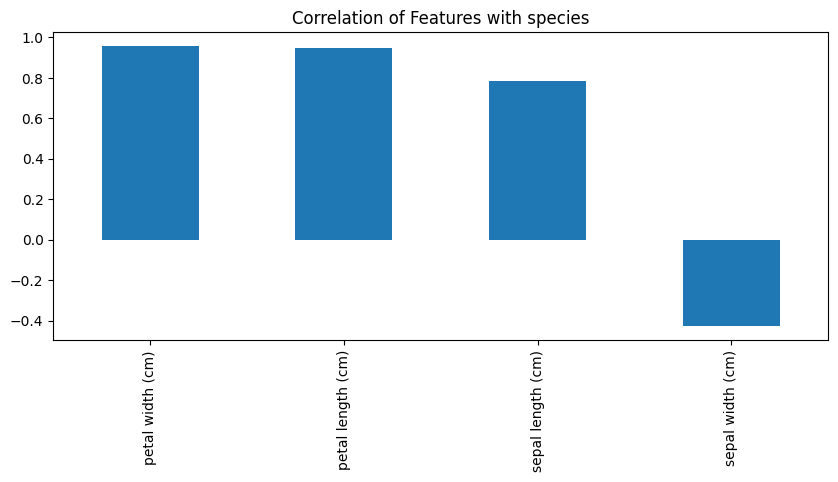

In [12]:
corr_with_target = X.corrwith(y)
corr_with_target.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title('Correlation of Features with species')
plt.show()

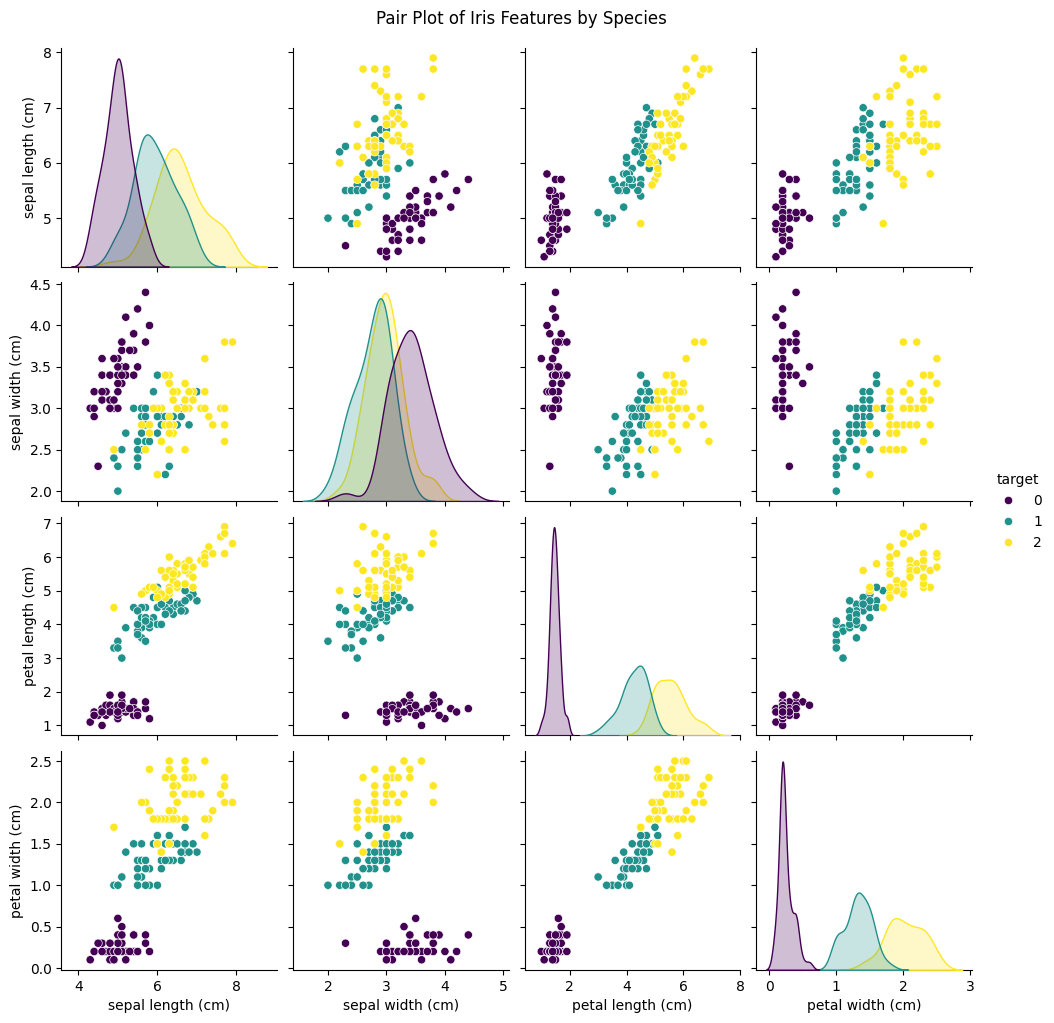

In [13]:
pairplot_data = X.copy()
pairplot_data['target'] = y
sns.pairplot(pairplot_data, hue='target', palette='viridis')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state = 42)

In [16]:
from sklearn.calibration import CalibratedClassifierCV
calib_DT_clf = CalibratedClassifierCV(DT_clf, cv=5, method='isotonic')
calib_DT_clf.fit(X_train, y_train)

CalibratedClassifierCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                       method='isotonic')

In [17]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(calib_DT_clf,X_train,y_train,cv = 5,scoring = 'accuracy')
cvs

array([0.95833333, 0.95833333, 0.83333333, 0.95833333, 0.95833333])

In [18]:
cvs.mean()*100

np.float64(93.33333333333333)

In [19]:
y_predicted = calib_DT_clf.predict(X_test)
y_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [20]:
y_probabilities = calib_DT_clf.predict_proba(X_test)
y_probabilities

array([[0.        , 0.94775503, 0.05224497],
       [0.92878992, 0.02692308, 0.044287  ],
       [0.        , 0.03846154, 0.96153846],
       [0.        , 0.94775503, 0.05224497],
       [0.        , 0.94775503, 0.05224497],
       [0.92878992, 0.02692308, 0.044287  ],
       [0.        , 0.94775503, 0.05224497],
       [0.        , 0.03846154, 0.96153846],
       [0.        , 0.94775503, 0.05224497],
       [0.        , 0.94775503, 0.05224497],
       [0.        , 0.03846154, 0.96153846],
       [0.92878992, 0.02692308, 0.044287  ],
       [0.92878992, 0.02692308, 0.044287  ],
       [0.92878992, 0.02692308, 0.044287  ],
       [0.92878992, 0.02692308, 0.044287  ],
       [0.        , 0.94775503, 0.05224497],
       [0.        , 0.03846154, 0.96153846],
       [0.        , 0.94775503, 0.05224497],
       [0.        , 0.94775503, 0.05224497],
       [0.        , 0.03846154, 0.96153846],
       [0.92878992, 0.02692308, 0.044287  ],
       [0.        , 0.03846154, 0.96153846],
       [0.

In [21]:
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
feature_importances = pd.Series(calib_DT_clf.estimator.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

,0
petal length (cm),0.906143
petal width (cm),0.077186
sepal width (cm),0.016670
sepal length (cm),0.000000


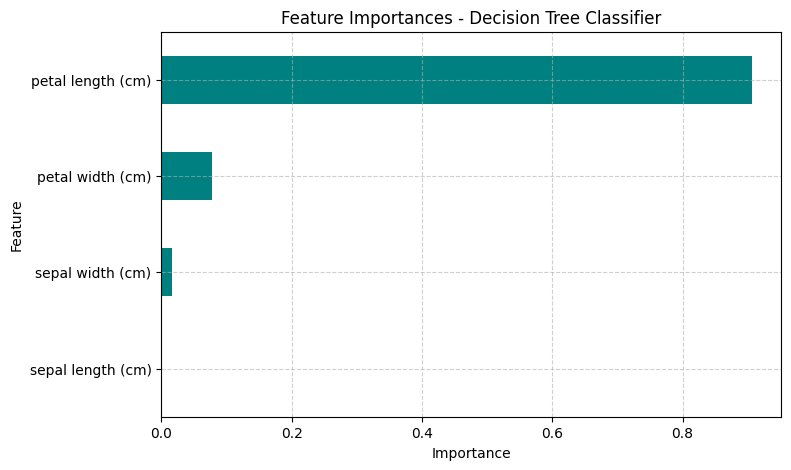

In [23]:
plt.figure(figsize=(8, 5))
feature_importances.plot(kind='barh', color='teal')
plt.title('Feature Importances - Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

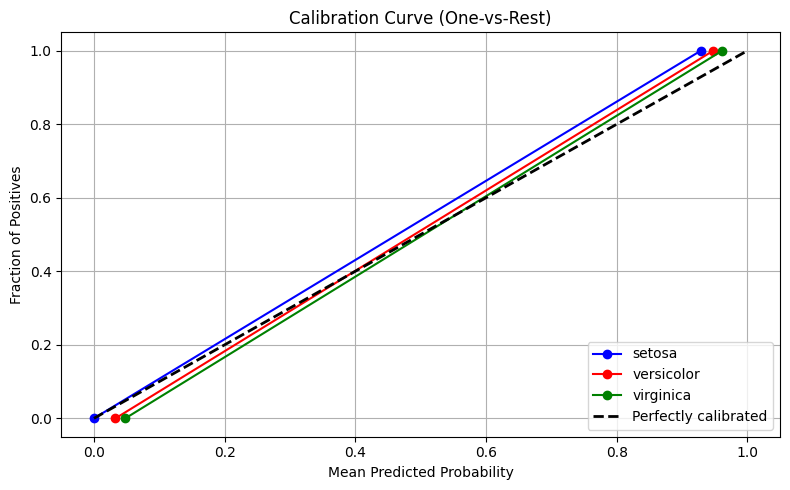

In [24]:
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

plt.figure(figsize=(8, 5))
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):

    prob_true, prob_pred = calibration_curve(y_test_binarized[:, i], y_probabilities[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color=color, label=f'{iris.target_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Perfectly calibrated')
plt.title('Calibration Curve (One-vs-Rest)')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

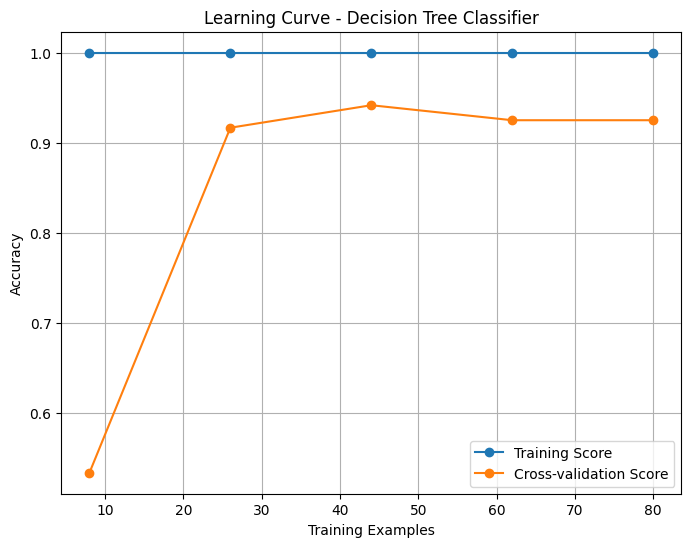

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    DT_clf, X_train, y_train, cv=3, scoring='accuracy'
)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)*100

100.0

In [27]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predicted,average = 'weighted')*100

100.0

In [28]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predicted,average = 'weighted')*100

100.0

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predicted,average = 'weighted')*100

100.0

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probabilities,multi_class = 'ovr')*100

np.float64(100.0)

In [31]:
from sklearn.metrics import log_loss
log_loss(y_test,y_probabilities)

0.055102924877114136

In [32]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_predicted)*100

np.float64(100.0)

In [33]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_predicted)*100

np.float64(100.0)

In [34]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test,y_probabilities,k = 2)*100

np.float64(100.0)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

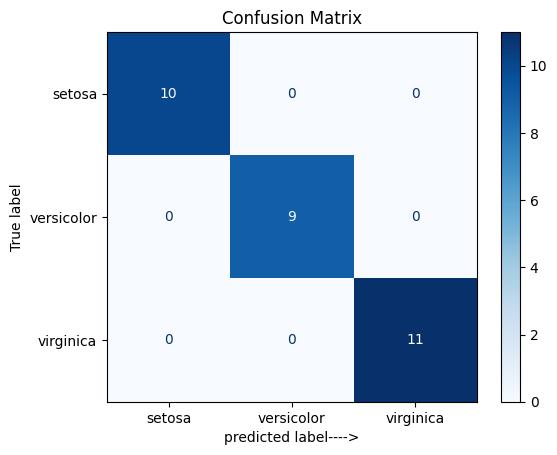

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm,display_labels = iris.target_names)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('predicted label---->')
plt.ylabel('True label')
plt.show()

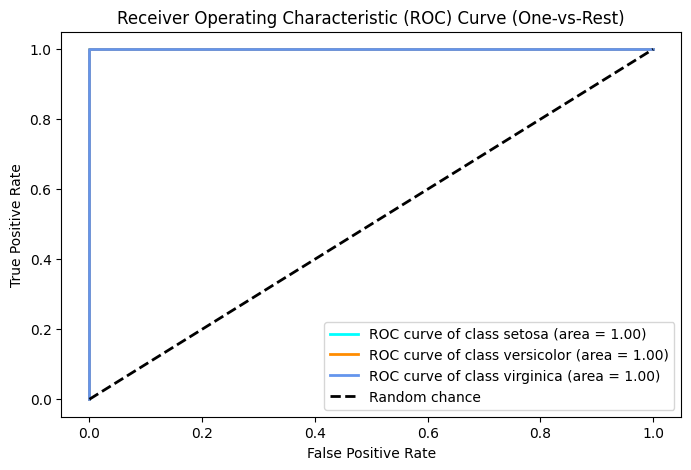

In [37]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 5))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'ROC curve of class {iris.target_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

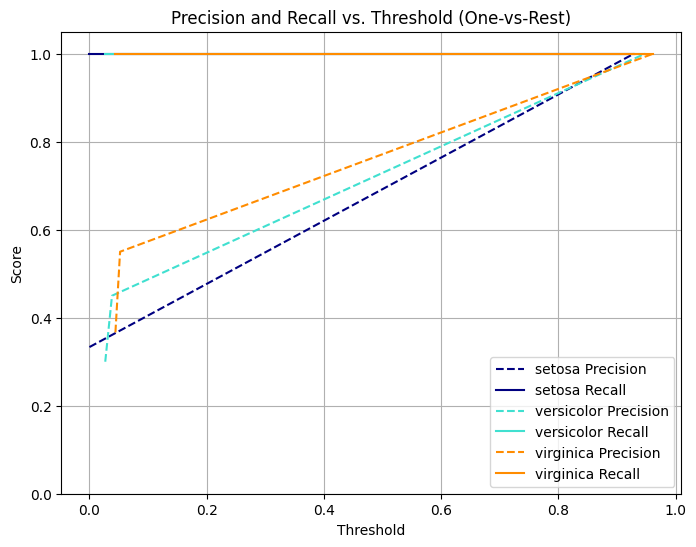

In [38]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize=(8, 6))
colors = cycle(['navy', 'turquoise', 'darkorange'])

for i, color in zip(range(n_classes), colors):

    precision, recall, thresholds = precision_recall_curve(y_test_binarized[:, i], y_probabilities[:, i])
    plt.plot(thresholds, precision[:-1], linestyle='--', color=color, label=f'{iris.target_names[i]} Precision')
    plt.plot(thresholds, recall[:-1], linestyle='-', color=color, label=f'{iris.target_names[i]} Recall')

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold (One-vs-Rest)")
plt.legend(loc="lower right")
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

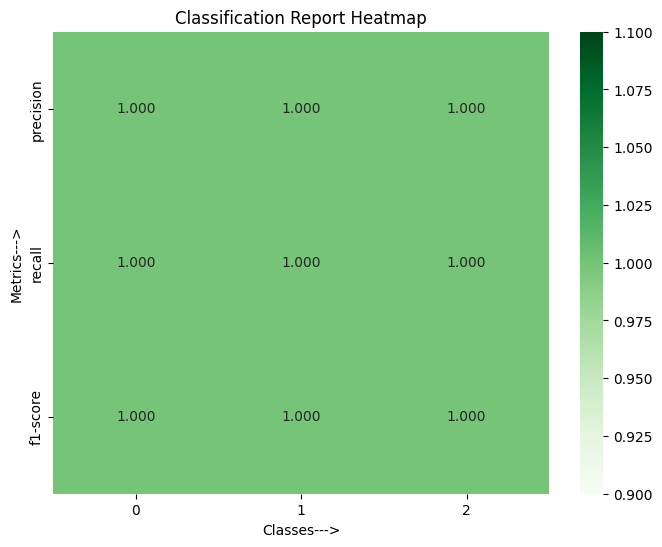

In [39]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_predicted, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report = clf_report.drop(columns=['support'])
plt.figure(figsize=(8, 6))
sns.heatmap(clf_report.iloc[:-3, :].T, annot=True, cmap='Greens', fmt=".3f")
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics--->')
plt.xlabel('Classes--->')
plt.show()